# Graphs

### Useful References

In [18]:
# Dependencies
from graph import Graph

import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

import random

In [19]:
# Configuration
frame_schema = {'graph': pl.Object, 'graph_id': pl.UInt64, 'graph_order': pl.UInt64, 'graph_size': pl.UInt64, 'encoding_length': pl.UInt64, 'edge_sequence': pl.List(pl.UInt64)}
graph_range = range(2, 11)

_ = pl.Config.set_fmt_table_cell_list_len(100)

### Graph ID Numbers

Graph ID numbers are the base 10 representation of the graphs binary string encoding.
This means that Graph ID's are not unique across different $n$'s but they are unique within the same $n$.

* $n = 4$ and $id = 3$ has string $0100$ 
* $n = 5$ and $id = 3$ has string $00100$

Notationally, a graph of order $n$ with $id$ is represented by the symbol $G_n^{id}$

| $n$ | $id$ | $\left< G_n^{id} \right>$ | | $n$ | $id$ | $\left< G_n^{id} \right>$ | 
|-----|------|---------------------------|-|-----|------|---------------------------|
| 3 | 0 | 000 | | 4 | 0 | 0000 |
| 3 | 1 | 001 | | 4 | 1 | 0001 |
| 3 | 2 | 010 | | 4 | 2 | 0010 |
| 3 | 3 | 011 | | 4 | 3 | 0011 |
| 3 | 4 | 100 | | 4 | 4 | 0100 |
| 3 | 5 | 101 | | 4 | 5 | 0101 |
| 3 | 6 | 110 | | 4 | 6 | 0110 |
| 3 | 7 | 111 | | 4 | 7 | 0111 |
|   |   |     | | 4 | 8 | 1000 |
|   |   |     | | 4 | 9 | 1001 |

### Graph Types

Common graph structures are given names for easy reference. 

* Complete Graphs ($K_n$): Graphs with all $n$ vertices connected to every other vertex in the graph
* Empty Graphs ($E_n$): Graphs with none of the $n$ vertices connected to any other vertex in the graph
* Path Graphs ($P_n$): Graphs with $n$ vertices connected in a row, but the first and last vertex are not connected
* Cycle Graphs ($C_n$): Graphs with a path, but the first and last vertices of the path are connected together

#### Complete Graphs ($K_n$)

* ID Number: $2^{n \times (n - 1) \div 2} - 1$
* Binary String Regex: $\left< K_n \right> = 1^{n \times (n - 1) \div 2}$

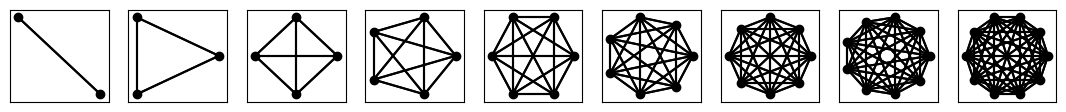

graph,graph_id,graph_order,graph_size,encoding_length,edge_sequence
object,u64,u64,u64,u64,list[u64]
1,1,2,1,1,"[1, 1]"
111,7,3,3,3,"[2, 2, 2]"
111111,63,4,6,6,"[3, 3, 3, 3]"
1111111111,1023,5,10,10,"[4, 4, 4, 4, 4]"
111111111111111,32767,6,15,15,"[5, 5, 5, 5, 5, 5]"
111111111111111111111,2097151,7,21,21,"[6, 6, 6, 6, 6, 6, 6]"
1111111111111111111111111111,268435455,8,28,28,"[7, 7, 7, 7, 7, 7, 7, 7]"
111111111111111111111111111111111111,68719476735,9,36,36,"[8, 8, 8, 8, 8, 8, 8, 8, 8]"
111111111111111111111111111111111111111111111,35184372088831,10,45,45,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]"


In [20]:
# Draw Complete Graphs and add to Dataframe
figure, axes = plt.subplots(1, graph_range.stop - 2)
figure.set_figheight(1.2)
figure.set_figwidth(1.5 * (graph_range.stop - 2))

new_graphs = []
for n in graph_range:
    g = Graph.complete_n(n)
    g.plot_graph(axes[n - 2])

    new_graphs.append([
        g, g.properties.id, g.properties.order, g.properties.size, g.properties.encoding_length, g.get_edge_sequence()
    ])

complete_graphs = pl.DataFrame(new_graphs, schema=frame_schema, orient="row")
plt.show()
complete_graphs

#### Empty Graphs ($E_n$)

* ID Number: $0$
* Binary String Regex: $\left< E_n \right> = 0^{n \times (n - 1) \div 2}$

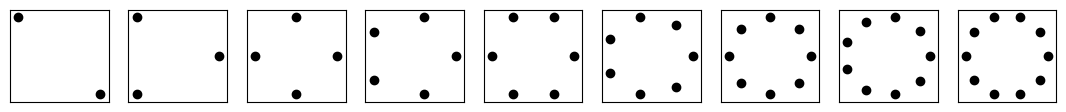

graph,graph_id,graph_order,graph_size,encoding_length,edge_sequence
object,u64,u64,u64,u64,list[u64]
0,0,2,0,1,"[0, 0]"
000,0,3,0,3,"[0, 0, 0]"
000000,0,4,0,6,"[0, 0, 0, 0]"
0000000000,0,5,0,10,"[0, 0, 0, 0, 0]"
000000000000000,0,6,0,15,"[0, 0, 0, 0, 0, 0]"
000000000000000000000,0,7,0,21,"[0, 0, 0, 0, 0, 0, 0]"
0000000000000000000000000000,0,8,0,28,"[0, 0, 0, 0, 0, 0, 0, 0]"
000000000000000000000000000000000000,0,9,0,36,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
000000000000000000000000000000000000000000000,0,10,0,45,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [21]:
# Draw Empty Graphs and add to Dataframe
figure, axes = plt.subplots(1, graph_range.stop - 2)
figure.set_figheight(1.2)
figure.set_figwidth(1.5 * (graph_range.stop - 2))

new_graphs = []
for n in graph_range:
    g = Graph.empty_n(n)
    g.plot_graph(axes[n - 2])

    new_graphs.append([
        g, g.properties.id, g.properties.order, g.properties.size, g.properties.encoding_length, g.get_edge_sequence()
    ])

empty_graphs = pl.DataFrame(new_graphs, schema=frame_schema, orient="row")
plt.show()
empty_graphs

#### Path Graphs ($P_n$)

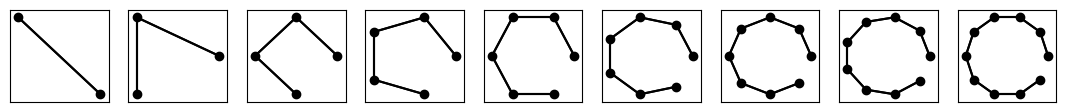

graph,graph_id,graph_order,graph_size,encoding_length,edge_sequence
object,u64,u64,u64,u64,list[u64]
1,1,2,1,1,"[1, 1]"
101,5,3,2,3,"[1, 2, 1]"
101001,41,4,3,6,"[1, 2, 2, 1]"
1010010001,657,5,4,10,"[1, 2, 2, 2, 1]"
101001000100001,21025,6,5,15,"[1, 2, 2, 2, 2, 1]"
101001000100001000001,1345601,7,6,21,"[1, 2, 2, 2, 2, 2, 1]"
1010010001000010000010000001,172236929,8,7,28,"[1, 2, 2, 2, 2, 2, 2, 1]"
101001000100001000001000000100000001,44092653825,9,8,36,"[1, 2, 2, 2, 2, 2, 2, 2, 1]"
101001000100001000001000000100000001000000001,22575438758401,10,9,45,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 1]"


In [22]:
# Draw Path Graphs and add to Dataframe
figure, axes = plt.subplots(1, graph_range.stop - 2)
figure.set_figheight(1.2)
figure.set_figwidth(1.5 * (graph_range.stop - 2))

new_graphs = []
for n in graph_range:
    g = Graph.path_n(n)
    g.plot_graph(axes[n - 2])

    new_graphs.append([
        g, g.properties.id, g.properties.order, g.properties.size, g.properties.encoding_length, g.get_edge_sequence()
    ])

path_graphs = pl.DataFrame(new_graphs, schema=frame_schema, orient="row")
plt.show()
path_graphs

#### Cycle Graphs ($C_n$)

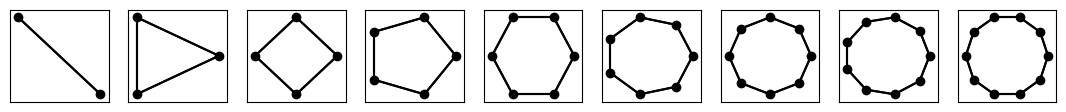

graph,graph_id,graph_order,graph_size,encoding_length,edge_sequence
object,u64,u64,u64,u64,list[u64]
1,1,2,1,1,"[1, 1]"
111,7,3,3,3,"[2, 2, 2]"
101101,45,4,4,6,"[2, 2, 2, 2]"
1010011001,665,5,5,10,"[2, 2, 2, 2, 2]"
101001000110001,21041,6,6,15,"[2, 2, 2, 2, 2, 2]"
101001000100001100001,1345633,7,7,21,"[2, 2, 2, 2, 2, 2, 2]"
1010010001000010000011000001,172236993,8,8,28,"[2, 2, 2, 2, 2, 2, 2, 2]"
101001000100001000001000000110000001,44092653953,9,9,36,"[2, 2, 2, 2, 2, 2, 2, 2, 2]"
101001000100001000001000000100000001100000001,22575438758657,10,10,45,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]"


In [23]:
# Draw Cycle Graphs and add to Dataframe
figure, axes = plt.subplots(1, graph_range.stop - 2)
figure.set_figheight(1.2)
figure.set_figwidth(1.5 * (graph_range.stop - 2))

new_graphs = []
for n in graph_range:
    g = Graph.cycle_n(n)
    g.plot_graph(axes[n - 2])

    new_graphs.append([
        g, g.properties.id, g.properties.order, g.properties.size, g.properties.encoding_length, g.get_edge_sequence()
    ])


cycle_graphs = pl.DataFrame(new_graphs, schema=frame_schema, orient="row")
plt.show()
cycle_graphs

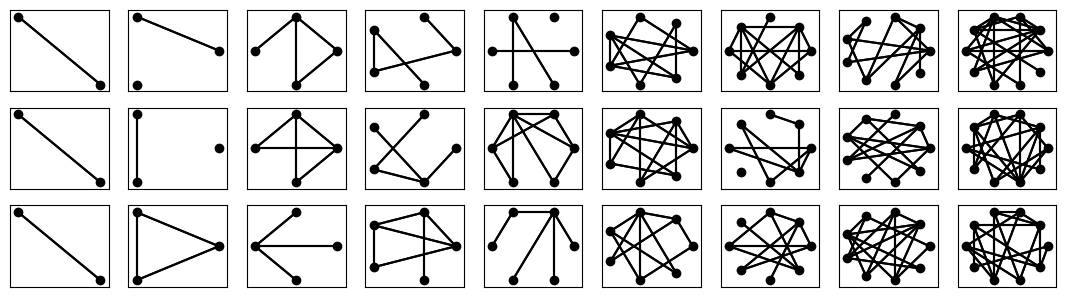

graph,graph_id,graph_order,graph_size,encoding_length,edge_sequence
object,u64,u64,u64,u64,list[u64]
1,1,2,1,1,"[1, 1]"
1,1,2,1,1,"[1, 1]"
1,1,2,1,1,"[1, 1]"
001,1,3,1,3,"[1, 1, 0]"
100,4,3,1,3,"[0, 1, 1]"
…,…,…,…,…,…
000000110010001000100001101001011001,841095769,9,12,36,"[4, 4, 1, 3, 4, 3, 1, 2, 2]"
000100111000011011100011110101000100,5241716036,9,16,36,"[2, 5, 4, 3, 5, 4, 3, 4, 2]"
000000010010100001111010001000111111000110110,159169936950,10,19,45,"[4, 6, 4, 6, 5, 4, 3, 3, 2, 1]"


In [24]:
# Draw Random Graphs and add to Dataframe
random.seed(1) # Just ensure the same graphs are generated each time
figure, axes = plt.subplots(3, graph_range.stop - 2)
figure.set_figheight(1.2 * 3)
figure.set_figwidth(1.5 * (graph_range.stop - 2))

new_graphs = []
for n in graph_range:

    for i in range(3):
        g = Graph.from_id(random.randint(1, int(2**(n*(n-1)/2)) - 1), n)
        g.plot_graph(axes[i][n - 2])

        new_graphs.append([
            g, g.properties.id, g.properties.order, g.properties.size, g.properties.encoding_length, g.get_edge_sequence()
        ])

random_graphs = pl.DataFrame(new_graphs, schema=frame_schema, orient="row")
plt.show()
random_graphs

In [25]:
all_graphs = pl.concat([
    complete_graphs, empty_graphs, path_graphs, cycle_graphs, random_graphs
])

all_graphs = all_graphs.sort(["graph_order", "graph_id"])
all_graphs

graph,graph_id,graph_order,graph_size,encoding_length,edge_sequence
object,u64,u64,u64,u64,list[u64]
0,0,2,0,1,"[0, 0]"
1,1,2,1,1,"[1, 1]"
1,1,2,1,1,"[1, 1]"
1,1,2,1,1,"[1, 1]"
1,1,2,1,1,"[1, 1]"
…,…,…,…,…,…
000000110001110010101010101011101010011000010,427707192514,10,19,45,"[3, 5, 4, 4, 5, 3, 3, 3, 6, 2]"
000000111010110011000001010111000111100100000,505064165152,10,18,45,"[2, 5, 4, 4, 4, 4, 2, 4, 3, 4]"
101001000100001000001000000100000001000000001,22575438758401,10,9,45,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 1]"
